# Fraud Detection with Logistic Regression and Feature Engineering

You are a data scientist at a financial institution, and your primary task is to develop a fraud detection model using logistic regression. The dataset you have is highly imbalanced, with only a small fraction of transactions being fraudulent. Your objective is to create an effective model by implementing logistic regression and employing various feature engineering techniques to improve the model's performance:

Data Preparation:
a. Load the dataset, and provide an overview of the available features, including transaction details, customer information, and labels (fraudulent or non-fraudulent).

b. Describe the class distribution of fraudulent and non-fraudulent transactions and discuss the imbalance issue.

Initial Logistic Regression Model:
a. Implement a basic logistic regression model using the raw dataset.

b. Evaluate the model's performance using standard metrics like accuracy, precision, recall, and F1-score

Feature Engineering:
a. Apply feature engineering techniques to enhance the predictive power of the model. These techniques may include:

-Creating new features.

-Scaling or normalizing features.

-Handling missing values.

-Encoding categorical variables.

b. Explain why each feature engineering technique is relevant for fraud detection.

Handling Imbalanced Data:
a. Discuss the challenges associated with imbalanced datasets in the context of fraud detection.

b. Implement strategies to address class imbalance, such as:

Oversampling the minority class.
-Undersampling the majority class.

-Using synthetic data generation techniques (e.g., SMOTE).

Logistic Regression with Feature-Engineered Data:
a. Train a logistic regression model using the feature-engineered dataset and the methods for handling imbalanced data. I

b. Evaluate the model's performance using appropriate evaluation metrics.

Model Interpretation:
a. Interpret the coefficients of the logistic regression model and discuss which features have the most influence on fraud detection.

b. Explain how the logistic regression model can be used for decision-making in identifying potential fraud.

Model Comparison:
a. Compare the performance of the initial logistic regression model with the feature-engineered and balanced data model.

b. Discuss the advantages and limitations of each approach.

Presentation and Recommendations:
a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the financial institution. Highlight the importance of feature engineering and handling imbalanced data in building an effective fraud detection system.

In this case study, you are required to showcase your ability to preprocess data, implement logistic regression, apply feature engineering techniques, and address class imbalance to improve the model's performance. Your analysis should also demonstrate your understanding of the nuances of fraud detection in a financial context.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the dataset
data=pd.read_csv("fraud.csv")
data.head()

,TransactionID,Amount,Time,Type,Location,CardHolder,IsFraud
0,1,120.75,1,Debit,Local,John Doe,0.0
1,2,50.00,2,Credit,International,Jane Smith,0.0
2,3,200.00,3,Debit,Local,Bob Johnson,0.0
3,4,30.25,4,Debit,Local,Alice Williams,0.0
4,5,500.50,5,Credit,International,Charlie Brown,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  105 non-null    int64  
 1   Amount         105 non-null    float64
 2   Time           105 non-null    int64  
 3   Type           105 non-null    object 
 4   Location       105 non-null    object 
 5   CardHolder     105 non-null    object 
 6   IsFraud        104 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.9+ KB


In [4]:
#b.Describe the class distribution of fraudulent and non-fraudulent transactions and discuss the imbalance issue.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,105.0,53.000000,30.454885,1.00,27.0,53.00,79.0,105.0
Amount,105.0,156.766667,133.783326,25.75,55.2,120.75,200.0,500.5
Time,105.0,53.000000,30.454885,1.00,27.0,53.00,79.0,105.0
IsFraud,104.0,0.144231,0.353025,0.00,0.0,0.00,0.0,1.0


In [5]:
data.isna().sum()

TransactionID    0
Amount           0
Time             0
Type             0
Location         0
CardHolder       0
IsFraud          1
dtype: int64

In [6]:
data= data.fillna(method="bfill")
data.isna().sum()

TransactionID    0
Amount           0
Time             0
Type             0
Location         0
CardHolder       0
IsFraud          0
dtype: int64

In [9]:
x = data.iloc[:,:3]
x.head()

,TransactionID,Amount,Time
0,1,120.75,1
1,2,50.00,2
2,3,200.00,3
3,4,30.25,4
4,5,500.50,5


In [12]:
y = data.iloc[:,-1:]
y.head()

,IsFraud
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


# Split the data for Training and Testing

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print('******************Training Data shape***************\n')
print('Training data-x-Shape:\t',xtrain.shape)
print()
print('Training data-y-Shape:\t',ytrain.shape)
print()
print('******************Testing Data shape*****************\n')
print('Testing data(x-Input) shape:\t',xtest.shape)
print()
print('Testing data(y-outcome)shape:\t',ytest.shape)

******************Training Data shape***************

Training data-x-Shape:	 (84, 3)

Training data-y-Shape:	 (84, 1)

******************Testing Data shape*****************

Testing data(x-Input) shape:	 (21, 3)

Testing data(y-outcome)shape:	 (21, 1)


# Model Development with Logistic Regression Algorithm

In [14]:
#invoke the log reg algorithm from sklearn

log_reg=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression**********************')
#train the model
print("Training Started.......\n")
print()
log_reg.fit(xtrain,ytrain)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred=log_reg.predict(xtest)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred))

********************Logistic Regression**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

Testing is also completed....

Testing samples are:	 21


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Performance Measures

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures for Logistic Regression*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))
print()
print('Precision Score:\t',precision_score(ytest,ypred))
print()
print('Recall Score:\t',recall_score(ytest,ypred))
print()
print('F1 Score:\t',f1_score(ytest,ypred))

*******************Performance Measures for Logistic Regression*************
Accuracy Score:	 0.9047619047619048

Confusion Matrix:
 [[18  0]
 [ 2  1]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        18
         1.0       1.00      0.33      0.50         3

    accuracy                           0.90        21
   macro avg       0.95      0.67      0.72        21
weighted avg       0.91      0.90      0.88        21


Precision Score:	 1.0

Recall Score:	 0.3333333333333333

F1 Score:	 0.5


In [16]:
log_reg.classes_

array([0., 1.])

In [17]:
log_reg.coef_

array([[-0.0082292 ,  0.00826213, -0.0082292 ]])

In [18]:
log_reg.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(solver='liblinear', verbose=2)>

In [19]:
log_reg.dual

False

In [20]:
log_reg.feature_names_in_

array(['TransactionID', 'Amount', 'Time'], dtype=object)

In [21]:
log_reg.fit_intercept

True

In [22]:
log_reg.intercept_

array([-2.40471908])

In [23]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

# ROC curve

In [24]:
y_probs=log_reg.predict_proba(xtest)[:,1]
y_probs

array([0.13159636, 0.27562803, 0.04688517, 0.16015347, 0.06064261,
       0.0347541 , 0.05527696, 0.08233546, 0.050395  , 0.1795998 ,
       0.30966868, 0.06399201, 0.10732688, 0.72905781, 0.30721145,
       0.07962086, 0.10489254, 0.07909951, 0.49924629, 0.03903085,
       0.24400669])

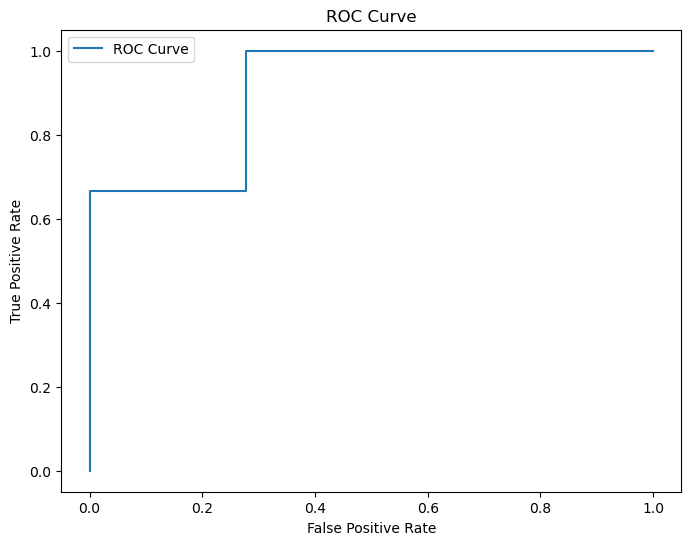

In [25]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

#Calculate ROC & AUC
fpr,tpr,thresholds=roc_curve(ytest,y_probs)
roc_auc=auc(fpr,tpr)

#plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [26]:
#Area under ROC curve
roc_auc

0.9074074074074074

In [27]:
cm=confusion_matrix(ytest,ypred)
cm

array([[18,  0],
       [ 2,  1]], dtype=int64)

# Feature Engineering(for improving performance of the model) using Scaling Method

In [28]:
#Scaling the model
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)

In [29]:
sc_x.shape

(105, 3)

In [30]:
sc_x[0]

array([-1.71563289, -0.27050762, -1.71563289])

In [31]:
sc_train_x=sc.fit_transform(xtrain)
sc_train_x

array([[ 5.88296587e-01, -6.20209002e-01,  5.88296587e-01],
       [ 7.51928750e-01, -6.93494493e-01,  7.51928750e-01],
       [ 1.50463670e+00,  1.43178474e+00,  1.50463670e+00],
       [ 7.84655182e-01,  1.92527092e-01,  7.84655182e-01],
       [-1.11347791e+00,  1.43178474e+00, -1.11347791e+00],
       [-5.89854988e-01,  1.80004433e+00, -5.89854988e-01],
       [-1.40801580e+00, -3.20929379e-02, -1.40801580e+00],
       [ 6.53749452e-01,  3.32502379e-01,  6.53749452e-01],
       [-4.26222825e-01, -7.28671528e-01, -4.26222825e-01],
       [-1.53892153e+00, -7.97926317e-01, -1.53892153e+00],
       [-9.89584987e-02, -3.20929379e-02, -9.89584987e-02],
       [ 3.91937991e-01,  2.53473138e+00,  3.91937991e-01],
       [-2.95317095e-01, -9.11518828e-01, -2.95317095e-01],
       [ 1.14464594e+00,  1.06535729e+00,  1.14464594e+00],
       [-1.47346867e+00,  1.06535729e+00, -1.47346867e+00],
       [ 1.43918384e+00,  1.92527092e-01,  1.43918384e+00],
       [ 1.30126530e-01,  1.92527092e-01

In [32]:
sc_train_x.shape

(84, 3)

In [33]:
sc_train_x[0]

array([ 0.58829659, -0.620209  ,  0.58829659])

In [34]:
sc_test_x=sc.fit_transform(xtest)
sc_test_x

array([[-1.49839289, -0.71423072, -1.49839289],
       [-1.36187987,  0.29240884, -1.36187987],
       [ 0.3104046 , -0.97221372,  0.3104046 ],
       [-0.78169955, -0.12702431, -0.78169955],
       [ 0.95884144, -0.37573341,  0.95884144],
       [ 1.30012398, -0.80359738,  1.30012398],
       [ 1.16361097, -0.37531187,  1.16361097],
       [ 0.27627635, -0.37573341,  0.27627635],
       [ 0.24214809, -0.92837347,  0.24214809],
       [-0.54280176,  0.13138023, -0.54280176],
       [-1.70316242,  0.29240884, -1.70316242],
       [-0.37216049, -0.97221372, -0.37216049],
       [ 1.02709795,  0.29240884,  1.02709795],
       [-0.26977573,  2.82586937, -0.26977573],
       [ 0.89058493,  1.5570314 ,  0.89058493],
       [ 1.70966304,  0.29240884,  1.70966304],
       [-0.71344304, -0.59029771, -0.71344304],
       [-0.91821256, -1.0080447 , -0.91821256],
       [ 0.07150682,  1.98067996,  0.07150682],
       [ 1.23186748, -0.71423072,  1.23186748],
       [-1.02059733,  0.29240884, -1.020

In [35]:
sc_test_x.shape

(21, 3)

In [36]:
sc_test_x[0]

array([-1.49839289, -0.71423072, -1.49839289])

# After Scaling-Build Logistic Regression model

In [37]:
log_reg_sc=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_sc.fit(sc_train_x,ytrain)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred=log_reg_sc.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred))

********************Logistic Regression**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]

Testing is also completed....

Testing samples are:	 21


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
#Performance Measures for log reg model which is built after scaling
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures for Logistic Regression*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification Report:\n',classification_report(ytest,ypred))
print()
print('Precision Score:\t',precision_score(ytest,ypred))
print()
print('Recall Score:\t',recall_score(ytest,ypred))
print()
print('F1 Score:\t',f1_score(ytest,ypred))

*******************Performance Measures for Logistic Regression*************
Accuracy Score:	 0.9523809523809523

Confusion Matrix:
 [[18  0]
 [ 1  2]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        18
         1.0       1.00      0.67      0.80         3

    accuracy                           0.95        21
   macro avg       0.97      0.83      0.89        21
weighted avg       0.95      0.95      0.95        21


Precision Score:	 1.0

Recall Score:	 0.6666666666666666

F1 Score:	 0.8


# Oversampling of minority class
1.)BY importing RandomOverSampler 2.)By importing SMOTE

# 1.)Using RandomOverSampler

In [40]:
from imblearn.over_sampling import RandomOverSampler

In [41]:
ros=RandomOverSampler(random_state=42)
ros_x,ros_y=ros.fit_resample(sc_train_x,ytrain)

# Build log reg model with Oversampling data(RandomOverSampler)

In [42]:
log_reg_ros=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression with oversampling data(RandomOverSampler)**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_ros.fit(ros_x,ros_y)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred_ros=log_reg_ros.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_ros)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred_ros))

********************Logistic Regression with oversampling data(RandomOverSampler)**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.]

Testing is also completed....

Testing samples are:	 21


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
#Performance Measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures for Logistic Regression after oversampling*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred_ros))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_ros))
print()
print('Classification Report:\n',classification_report(ytest,ypred_ros))
print()
print('Precision Score:\t',precision_score(ytest,ypred_ros))
print()
print('Recall Score:\t',recall_score(ytest,ypred_ros))
print()
print('F1 Score:\t',f1_score(ytest,ypred_ros))

*******************Performance Measures for Logistic Regression after oversampling*************
Accuracy Score:	 0.9047619047619048

Confusion Matrix:
 [[17  1]
 [ 1  2]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        18
         1.0       0.67      0.67      0.67         3

    accuracy                           0.90        21
   macro avg       0.81      0.81      0.81        21
weighted avg       0.90      0.90      0.90        21


Precision Score:	 0.6666666666666666

Recall Score:	 0.6666666666666666

F1 Score:	 0.6666666666666666


# 2.)Using SMOTE

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data
sm_train_x, sm_train_y = smote.fit_resample(sc_train_x, ytrain)

# Build log reg model with Oversampling data(SMOTE)

In [47]:
log_reg_sm=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression with oversampling data(SMOTE)**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_sm.fit(sm_train_x,sm_train_y)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred_sm=log_reg_sm.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_sm)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred_sm))

********************Logistic Regression with oversampling data(SMOTE)**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.]

Testing is also completed....

Testing samples are:	 21


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
#Performance Measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures of log reg after oversampling*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred_sm))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_sm))
print()
print('Classification Report:\n',classification_report(ytest,ypred_sm))
print()
print('Precision Score:\t',precision_score(ytest,ypred_sm))
print()
print('Recall Score:\t',recall_score(ytest,ypred_sm))
print()
print('F1 Score:\t',f1_score(ytest,ypred_sm))

*******************Performance Measures of log reg after oversampling*************
Accuracy Score:	 0.8571428571428571

Confusion Matrix:
 [[16  2]
 [ 1  2]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.89      0.91        18
         1.0       0.50      0.67      0.57         3

    accuracy                           0.86        21
   macro avg       0.72      0.78      0.74        21
weighted avg       0.88      0.86      0.87        21


Precision Score:	 0.5

Recall Score:	 0.6666666666666666

F1 Score:	 0.5714285714285715


# Undersampling of Majority class(Only method-using RandomUnderSampler)

In [49]:
from imblearn.under_sampling import RandomUnderSampler

In [50]:
# Create a RandomUnderSampler instance
rus = RandomUnderSampler(random_state=42)

# Fit and resample the training data
rus_train_x, rus_train_y = rus.fit_resample(sc_train_x, ytrain)
print(rus_train_x,rus_train_y)

[[-1.11347791  1.43178474 -1.11347791]
 [-0.81894002  1.06535729 -0.81894002]
 [ 0.1955794   1.43178474  0.1955794 ]
 [ 0.58829659 -0.620209    0.58829659]
 [ 1.47191027 -0.9444973   1.47191027]
 [-1.04802505 -0.24828514 -1.04802505]
 [-1.47346867  1.06535729 -1.47346867]
 [ 0.32648513  0.33250238  0.32648513]
 [ 0.13012653  0.19252709  0.13012653]
 [ 0.94828735 -0.76677998  0.94828735]
 [ 0.45739086 -0.24791871  0.45739086]
 [ 1.53736313 -0.72867153  1.53736313]
 [-0.58985499  1.80004433 -0.58985499]
 [-1.4080158  -0.03209294 -1.4080158 ]
 [-0.0989585  -0.03209294 -0.0989585 ]
 [ 0.39193799  2.53473138  0.39193799]
 [-1.24438364  1.80004433 -1.24438364]
 [ 0.55557015 -0.03209294  0.55557015]
 [ 0.71920232  1.80004433  0.71920232]
 [ 1.37373097  1.80004433  1.37373097]
 [-0.91711931  2.53473138 -0.91711931]
 [-1.57164797  2.53473138 -1.57164797]
 [ 1.21009881 -0.03209294  1.21009881]
 [ 1.7009953   2.53473138  1.7009953 ]]     IsFraud
0       0.0
1       0.0
2       0.0
3       0.0
4  

# Build log reg model with Undersampling data

In [51]:
log_reg_rus=LogisticRegression(solver='liblinear',verbose=2)
print('********************Logistic Regression with undersampling data(RandomUnderSampler)**********************')
#train the model
print("Training Started.......\n")
print()
log_reg_rus.fit(rus_train_x,rus_train_y)
print('Training completed.....')
print()
#test the model
print('Testing invoked......\n')
ypred_rus=log_reg_rus.predict(sc_test_x)
print('Predicted Class Labels are: \n',ypred_rus)
print('\nTesting is also completed....\n')
print('Testing samples are:\t',len(ypred_rus))

********************Logistic Regression with undersampling data(RandomUnderSampler)**********************
Training Started.......


[LibLinear]Training completed.....

Testing invoked......

Predicted Class Labels are: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.]

Testing is also completed....

Testing samples are:	 21


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
#Performance Measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


print('*******************Performance Measures after undersampling*************')
print('Accuracy Score:\t',accuracy_score(ytest,ypred_rus))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred_rus))
print()
print('Classification Report:\n',classification_report(ytest,ypred_rus))
print()
print('Precision Score:\t',precision_score(ytest,ypred_rus))
print()
print('Recall Score:\t',recall_score(ytest,ypred_rus))
print()
print('F1 Score:\t',f1_score(ytest,ypred_rus))

*******************Performance Measures after undersampling*************
Accuracy Score:	 0.8571428571428571

Confusion Matrix:
 [[16  2]
 [ 1  2]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.89      0.91        18
         1.0       0.50      0.67      0.57         3

    accuracy                           0.86        21
   macro avg       0.72      0.78      0.74        21
weighted avg       0.88      0.86      0.87        21


Precision Score:	 0.5

Recall Score:	 0.6666666666666666

F1 Score:	 0.5714285714285715
